In [13]:
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress
from sklearn import datasets
from pprint import pprint




In [14]:
# Save config information
url = "https://data.opendatasoft.com/api/explore/v2.1/catalog/datasets/super-bowl@public/records?limit=54"


In [15]:
super_bowl_url = requests.get(url)
super_bowl_data = super_bowl_url.json()
pprint(super_bowl_data)


{'results': [{'attendance': 80562,
              'back_judge': None,
              'city': 'New Orleans',
              'coach_loser': 'Bud Grant',
              'coach_winner': 'Hank Stram',
              'date': '1970-01-11',
              'field_judge': None,
              'geo_point_2d': {'lat': 31.0480777894, 'lon': -91.9572061819},
              'geo_shape': {'geometry': {'coordinates': [[[-89.21767, 29.29108],
                                                          [-89.4083872139,
                                                           29.1597708196],
                                                          [-89.77928, 29.30714],
                                                          [-90.15463, 29.11743],
                                                          [-90.880225,
                                                           29.148535],
                                                          [-91.626785, 29.677],
                                             

In [16]:
results = super_bowl_data.get("results", [])
super_bowl_data_df = pd.DataFrame(results)

latitudes = []
longitudes = []
dates = []
for result in results:
    # Access the 'geo_point_2d' dictionary within each result
    geo_point_2d = result['geo_point_2d']
   
    # Extract the 'lat' and 'lon' values and append them to the respective lists
    latitudes.append(geo_point_2d['lat'])
    longitudes.append(geo_point_2d['lon'])
    dates.append(result['date'])
locations_df = pd.DataFrame({'date': dates, 'Latitude': latitudes, 'Longitude': longitudes, })

super_bowl_history_df = pd.merge(super_bowl_data_df, locations_df, how='left', on='date')
super_bowl_history_df.head()

,date,sb,attendance,winner,qb_winner,coach_winner,winning_pts,loser,qb_loser,coach_loser,...,umpire,head_linesman,line_judge,field_judge,back_judge,side_judge,geo_shape,geo_point_2d,Latitude,Longitude
0,1970-01-11,IV,80562,Kansas City Chiefs,"Len Dawson, Mike Livingston",Hank Stram,23,Minnesota Vikings,Joe Kapp,Bud Grant,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -91.9572061819, 'lat': 31.0480777894}",31.048078,-91.957206
1,1993-01-31,XXVII,98374,Dallas Cowboys,Troy Aikman,Jimmy Johnson,52,Buffalo Bills,"Jim Kelly, Frank Reich",Marv Levy,...,Ron Botchan,Ron Phares,Dick McKenzie,Donnie Hampton,Jim Poole,Dean Look,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -119.640543961, 'lat': 37.2551445335}",37.255145,-119.640544
2,1999-01-31,XXXIII,74803,Denver Broncos,John Elway,Mike Shanahan,34,Atlanta Falcons,Chris Chandler,Dan Reeves,...,Jim Daopoulos,Sanford Rivers,Ron Baynes,Tim Millis,Don Hakes,Gary Lane,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -82.5025741003, 'lat': 28.6169283051}",28.616928,-82.502574
3,2018-02-04,LII,67612,Philadelphia Eagles,Nick Foles,Doug Pederson,41,New England Patriots,Tom Brady,Bill Belichick,...,Roy Ellison,Jerry Bergman,Byron Boston,Tom Hill,Perry Paganelli,Scott Edwards,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -94.1774361191, 'lat': 46.3600731634}",46.360073,-94.177436
4,1991-01-27,XXV,73813,New York Giants,Jeff Hostetler,Bill Parcells,20,Buffalo Bills,Jim Kelly,Marv Levy,...,Art Demmas,Sid Semon,Dick McKenzie,Jack Vaughan,Banks Williams,Larry Nemmers,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -82.5025741003, 'lat': 28.6169283051}",28.616928,-82.502574


In [17]:
super_bowl_history_df['date'] = pd.to_datetime(super_bowl_history_df['date'])
super_bowl_history_df.sort_values(by='date', ascending=True, inplace=True)
super_bowl_history_df.reset_index(drop=True, inplace=True)
super_bowl_history_df.head()

,date,sb,attendance,winner,qb_winner,coach_winner,winning_pts,loser,qb_loser,coach_loser,...,umpire,head_linesman,line_judge,field_judge,back_judge,side_judge,geo_shape,geo_point_2d,Latitude,Longitude
0,1967-01-15,I,61946,Green Bay Packers,Bart Starr,Vince Lombardi,35,Kansas City Chiefs,Len Dawson,Hank Stram,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -119.640543961, 'lat': 37.2551445335}",37.255145,-119.640544
1,1968-01-14,II,75546,Green Bay Packers,Bart Starr,Vince Lombardi,33,Oakland Raiders,Daryle Lamonica,John Rauch,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -82.5025741003, 'lat': 28.6169283051}",28.616928,-82.502574
2,1969-01-12,III,75389,New York Jets,Joe Namath,Weeb Ewbank,16,Baltimore Colts,"Earl Morrall, Johnny Unitas",Don Shula,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -82.5025741003, 'lat': 28.6169283051}",28.616928,-82.502574
3,1970-01-11,IV,80562,Kansas City Chiefs,"Len Dawson, Mike Livingston",Hank Stram,23,Minnesota Vikings,Joe Kapp,Bud Grant,...,None,None,None,None,None,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -91.9572061819, 'lat': 31.0480777894}",31.048078,-91.957206
4,1971-01-17,V,79204,Baltimore Colts,"Earl Morrall , Johnny Unitas",Don McCafferty,16,Dallas Cowboys,Craig Morton,Tom Landry,...,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,None,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': -82.5025741003, 'lat': 28.6169283051}",28.616928,-82.502574


In [18]:
drop_columns = ["referee", "umpire", "head_linesman", "line_judge", 
                "field_judge", "back_judge", "side_judge", "qb_winner",
                "coach_winner", "winning_pts", "qb_loser", "coach_loser",
                "losing_pts", "mvp","point_difference","geo_shape", "geo_point_2d"]
super_bowl_history_df.drop(columns=drop_columns, inplace=True)
super_bowl_history_df.head()

,date,sb,attendance,winner,loser,stadium,city,state,Latitude,Longitude
0,1967-01-15,I,61946,Green Bay Packers,Kansas City Chiefs,Memorial Coliseum,Los Angeles,California,37.255145,-119.640544
1,1968-01-14,II,75546,Green Bay Packers,Oakland Raiders,Orange Bowl,Miami,Florida,28.616928,-82.502574
2,1969-01-12,III,75389,New York Jets,Baltimore Colts,Orange Bowl,Miami,Florida,28.616928,-82.502574
3,1970-01-11,IV,80562,Kansas City Chiefs,Minnesota Vikings,Tulane Stadium,New Orleans,Louisiana,31.048078,-91.957206
4,1971-01-17,V,79204,Baltimore Colts,Dallas Cowboys,Orange Bowl,Miami,Florida,28.616928,-82.502574


In [19]:
sb_views = "Resources/Super Bowl Ratings and viewership, all-time.csv"

views_df = pd.read_csv(sb_views)

views_df = views_df.sort_values(by="Year", ascending=True) 
views_df = views_df.drop_duplicates(subset="Year", keep="first")
views_extract = views_df["TV Vwrs"]
views_extract = views_extract[:-3]
views_extract  = views_extract.reset_index(drop=True)
views_extract.head()

0    26750000.0
1    39120000.0
2    41660000.0
3    44270000.0
4    46040000.0
Name: TV Vwrs, dtype: float64

In [20]:
final_df = pd.merge(super_bowl_history_df, views_extract, how="left", left_index=True, right_index=True)
final_df = final_df.rename(columns={"date": "Date", "sb": "Super Bowl", "attendance": "Attendance", 
                        "winner": "Winning Team", "loser": "Losing Team", "stadium": "Stadium", 
                        "city": "City", "state": "State","TV Vwrs": "Average TV Viewership (US)"})

#final_df[['Latitude', 'Longitude']] = final_df['Latitude, Longitude'].str.split(',', expand=True)  
#final_df['Longitude'] = final_df['Longitude'].str.strip().str.replace("'", "").astype(float)
#final_df['Latitude'] = final_df['Latitude'].str.strip().str.replace("'", "").astype(float)   
#final_df.drop(columns=['Latitude, Longitude'], inplace=True)    

final_df["Average TV Viewership (US)"] = final_df["Average TV Viewership (US)"].astype(int).round(0)
final_df = final_df.reset_index(drop=True)
final_df.head()



,Date,Super Bowl,Attendance,Winning Team,Losing Team,Stadium,City,State,Latitude,Longitude,Average TV Viewership (US)
0,1967-01-15,I,61946,Green Bay Packers,Kansas City Chiefs,Memorial Coliseum,Los Angeles,California,37.255145,-119.640544,26750000
1,1968-01-14,II,75546,Green Bay Packers,Oakland Raiders,Orange Bowl,Miami,Florida,28.616928,-82.502574,39120000
2,1969-01-12,III,75389,New York Jets,Baltimore Colts,Orange Bowl,Miami,Florida,28.616928,-82.502574,41660000
3,1970-01-11,IV,80562,Kansas City Chiefs,Minnesota Vikings,Tulane Stadium,New Orleans,Louisiana,31.048078,-91.957206,44270000
4,1971-01-17,V,79204,Baltimore Colts,Dallas Cowboys,Orange Bowl,Miami,Florida,28.616928,-82.502574,46040000


The r-squared is: 0.8230394157030263


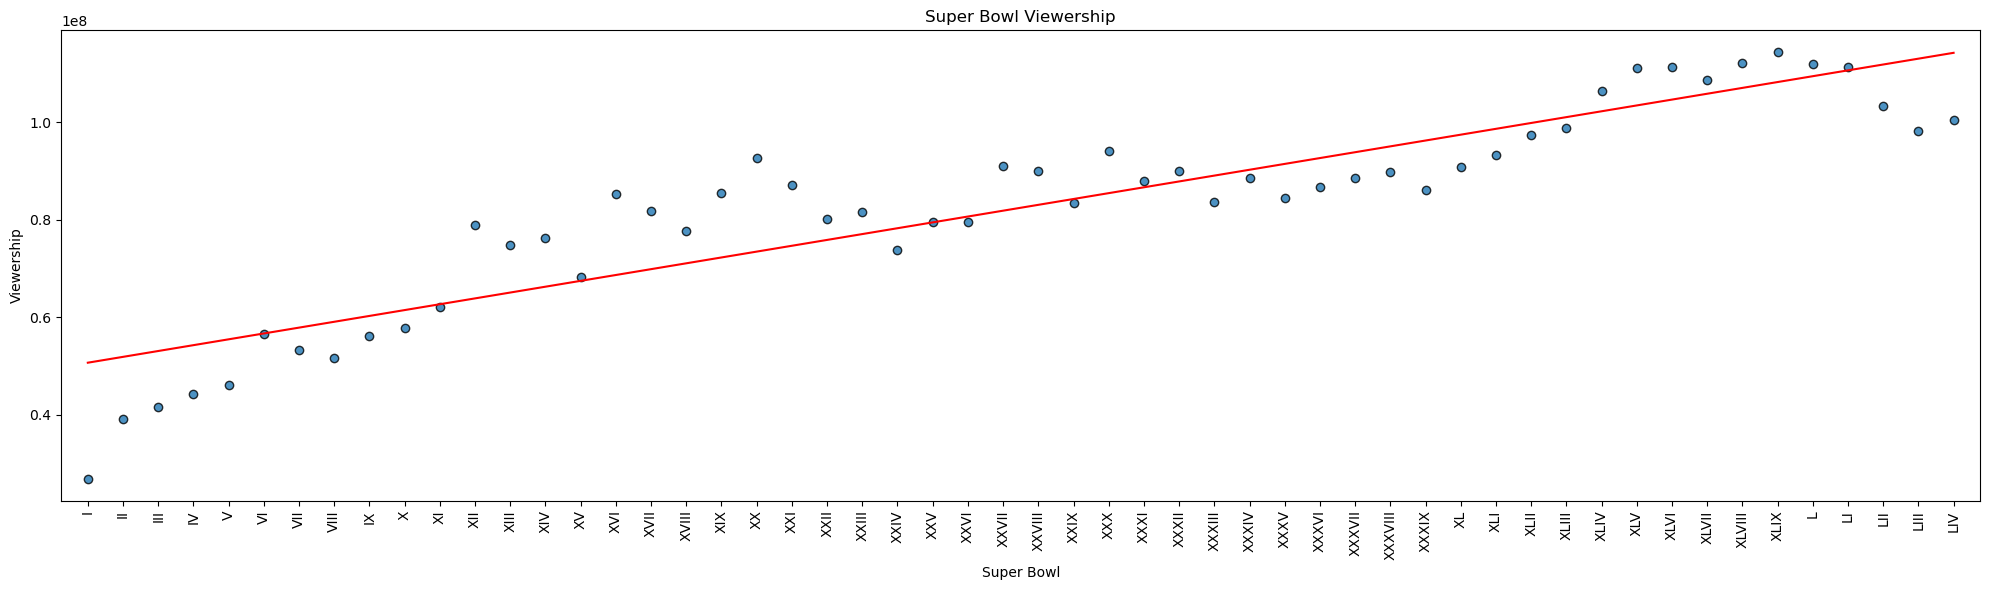

In [21]:

x_values = np.arange(len(final_df))
y_values = final_df["Average TV Viewership (US)"]
x_tick_locations = [value for value in x_values]

plt.figure(figsize=(20,6))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
plt.annotate(line_eq, (10, 50), color="red")

plt.xticks(x_tick_locations, final_df["Super Bowl"], rotation=90)
plt.xlim(-0.75, len(x_values)-0.25)

plt.title("Super Bowl Viewership")
plt.xlabel("Super Bowl")
plt.ylabel("Viewership")

print(f"The r-squared is: {r_value**2}")
plt.tight_layout()
plt.show()



The r-squared is: 0.10972366452732037


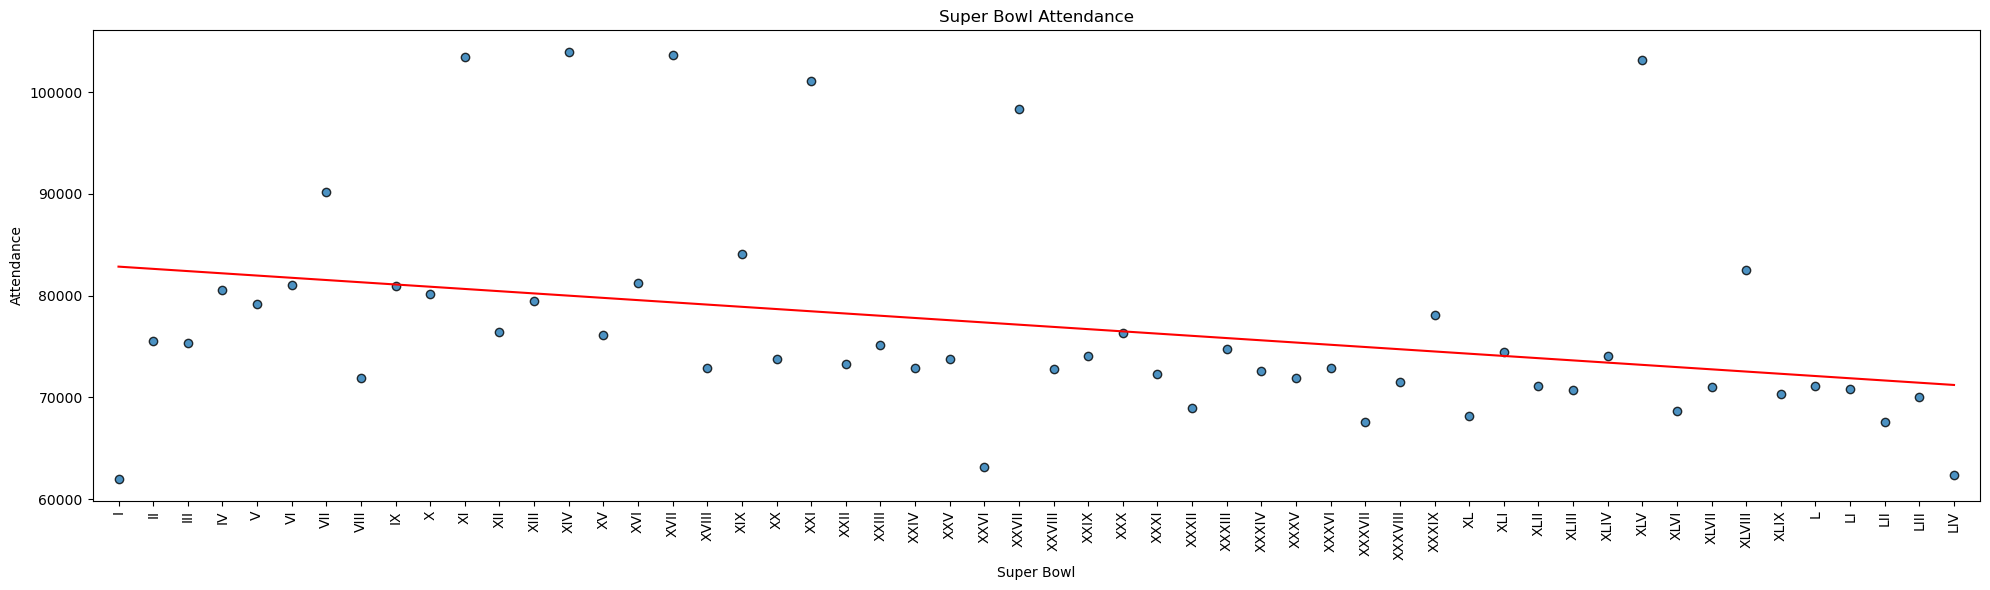

In [22]:
x_values = np.arange(len(final_df))
y_values = final_df["Attendance"]
x_tick_locations = [value for value in x_values]

plt.figure(figsize=(20,6))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values, edgecolor="black", marker="o", alpha=0.8)
plt.annotate(line_eq, (10, 50), color="red")

plt.xticks(x_tick_locations, final_df["Super Bowl"], rotation=90)
plt.xlim(-0.75, len(x_values)-0.25)

plt.title("Super Bowl Attendance")
plt.xlabel("Super Bowl")
plt.ylabel("Attendance")


print(f"The r-squared is: {r_value**2}")
plt.tight_layout()
plt.show()


In [23]:
stadium_locations = pd.DataFrame(final_df)

map_plot_1 = stadium_locations.hvplot.points(
   "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    size = "Attendance",
    scale = 0.1,
    color = "City",
    sort_date = "Date"
)
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City,Attendance)